### Import 1) main data table and 2) VALSE summary statistics for model outputs

In [1]:
import pandas as pd

models = ['LXMERT', 'CLIP', 'FLAVA', 'SigLip']

# 1) main data table
df = pd.read_pickle('distances_outputs_table.pickle')
df

,filename,caption,foil,linguistic_phenomena,model,model_shap_positive_normalized,human_map,RC_to_human,EMD_to_human,model_pred_caption,model_pred_foil,model_pred_diff,model_pred_diff_normalized
0,licking_291.jpg,A cow licks its fur.,A cow wrinkles its fur.,actions,LXMERT,"[[0.07359886674465907, 0.02998819329604594, 0....","[[0.0014743265527438847, 0.01573516504970489, ...",-0.058824,0.983263,0.004516,0.018551,-0.014034,-0.085181
1,counting_103.jpg,A person counts money.,A person pays money.,actions,LXMERT,"[[0.10524416414966785, 0.13240805706235903, 0....","[[0.004482754295119378, 0.029023927486055416, ...",-0.464706,1.118272,0.001854,0.001183,0.000671,0.004074
2,v7w_2411632.jpg,There are no people in the photo.,There is at least one person in the photo.,existence,LXMERT,"[[0.005573892832708572, 0.0672021870488928, 0....","[[7.25101021142701e-07, 0.006881846083901585, ...",0.300000,0.897321,0.516299,0.030346,0.485952,2.949508
3,urinating_251.jpg,A man urinates against a wall.,A man skates against a wall.,actions,LXMERT,"[[0.0298257918219853, 0.13789591026754916, 0.0...","[[0.012884411289709949, 0.0253810418266228, 0....",0.338235,0.714441,0.602664,0.011472,0.591192,3.588263
4,v7w_2390850.jpg,There are no people in the water.,There is at least one person in the water.,existence,LXMERT,"[[0.034739605778902866, 0.05373696695722698, 0...","[[0.04304823942671234, 0.3141493061042169, 0.2...",0.522446,1.023692,0.011590,0.001473,0.010117,0.061403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,v7w_2363335.jpg,There is a mast on the closest boat.,There is no mast on the closest boat.,existence,FLAVA,"[[0.10762498903891778, 0.10600056876510631, 0....","[[0.0, 0.0, 0.0, 0.0], [0.0038761918414842236,...",-0.265192,1.613585,14.154673,14.714719,-0.560046,-0.193064
364,v7w_2367084.jpg,There is a giraffe.,There is no giraffe.,existence,FLAVA,"[[0.11606520796315897, 0.0032524290430023346, ...","[[0.058031671761254025, 0.011923543607465443, ...",0.382132,0.811894,15.711895,15.363859,0.348036,0.119978
365,v7w_2373121.jpg,There are no clouds in the sky.,There is at least one cloud in the sky.,existence,FLAVA,"[[0.1333684719184068, 0.02332404943837514, 0.0...","[[0.06944438863843619, 0.3078465814086114, 0.2...",0.185431,1.103381,9.280195,9.946142,-0.665947,-0.229570
366,v7w_2390850.jpg,There are no people in the water.,There is at least one person in the water.,existence,FLAVA,"[[0.010906337368241143, 0.021492206313915848, ...","[[0.04304823942671234, 0.3141493061042169, 0.2...",-0.176139,1.478958,21.434097,17.754848,3.679249,1.268340


Now get summary statistics for model outputs on larger VALSE dataset for the three phenomena

This is to normalize out data if needed

In [2]:
# 2) VALSE summary statistics (to help normalize the data)

valse_stats = pd.read_pickle("valse_statistics.pickle")
valse_stats

,metric (VALSE wide model output),LXMERT,CLIP,FLAVA,SigLip
0,mean,0.010805,0.953458,1.300020,1.024050
1,std,0.164757,1.709227,2.900839,2.333226
2,acc_overall,0.532802,0.715965,0.672355,0.667804
3,acc_existence,0.768317,0.691089,0.623762,0.695050
4,acc_relations,0.605607,0.659813,0.628037,0.605607
5,acc_actions,0.433939,0.742642,0.702567,0.680025


Dictionary of standard deviations

In [3]:
std_dict = {model: valse_stats[model][1] for model in models}
std_dict

{'LXMERT': 0.16475711080227196,
 'CLIP': 1.7092266728418823,
 'FLAVA': 2.9008389614531467,
 'SigLip': 2.3332262581219814}

### Create normalized model_pred_diff column

In [4]:
model_pred_diff_normalized = []

for model, model_pred_diff in zip(df['model'], df['model_pred_diff']):

    # get std

    std = std_dict[model]
    model_pred_diff_normalized.append(model_pred_diff / std)

df['model_pred_diff_normalized'] = model_pred_diff_normalized

df.to_pickle("distances_outputs_table.pickle")

df.head(3)

,filename,caption,foil,linguistic_phenomena,model,model_shap_positive_normalized,human_map,RC_to_human,EMD_to_human,model_pred_caption,model_pred_foil,model_pred_diff,model_pred_diff_normalized
0,licking_291.jpg,A cow licks its fur.,A cow wrinkles its fur.,actions,LXMERT,"[[0.07359886674465907, 0.02998819329604594, 0....","[[0.0014743265527438847, 0.01573516504970489, ...",-0.058824,0.983263,0.004516,0.018551,-0.014034,-0.085181
1,counting_103.jpg,A person counts money.,A person pays money.,actions,LXMERT,"[[0.10524416414966785, 0.13240805706235903, 0....","[[0.004482754295119378, 0.029023927486055416, ...",-0.464706,1.118272,0.001854,0.001183,0.000671,0.004074
2,v7w_2411632.jpg,There are no people in the photo.,There is at least one person in the photo.,existence,LXMERT,"[[0.005573892832708572, 0.0672021870488928, 0....","[[7.25101021142701e-07, 0.006881846083901585, ...",0.300000,0.897321,0.516299,0.030346,0.485952,2.949508


# Scatterplot and correlation by model!

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_50884/100643869.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # adjust subplots to fit into figure area


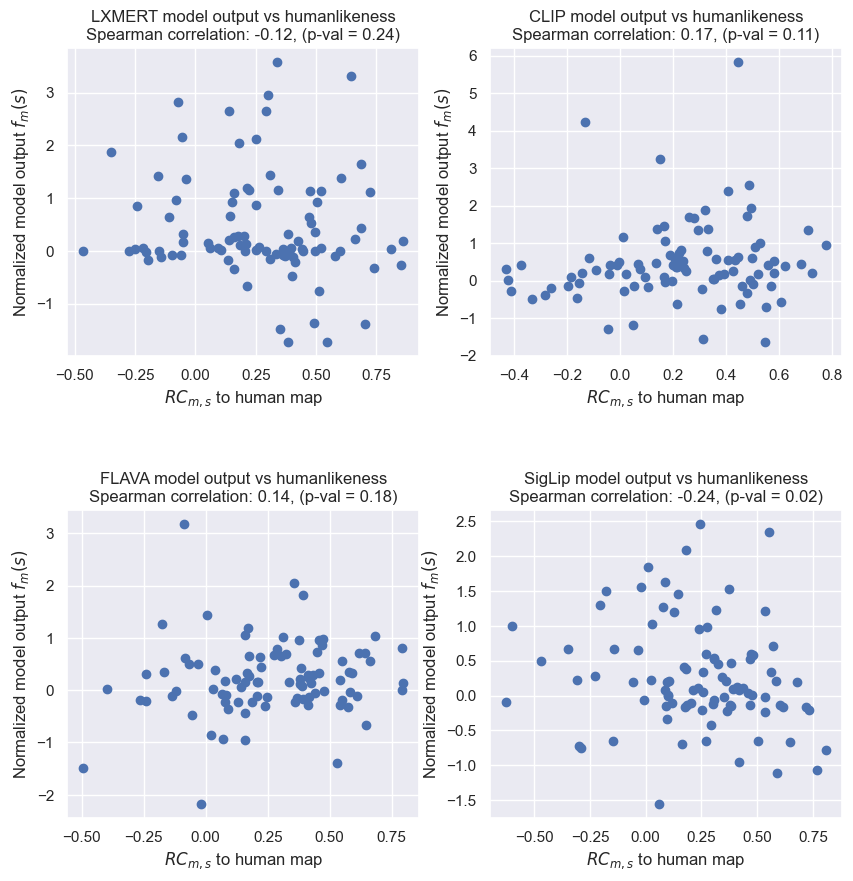

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# set seaborn dark theme
sns.set_theme(style="darkgrid")

# create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'hspace': 0.5})  # Adjust size as needed
axs = axs.flatten()  # Flatten the array for easy indexing

# iterate through models and subplots
for i, model in enumerate(models):
    filtered_df = df[df['model'] == model]

    # get data for each variable
    rc_to_human = filtered_df['RC_to_human'] # x variable
    model_outputs_norm = filtered_df['model_pred_diff_normalized'] # y variable

    spearman_corr, p_value = spearmanr(rc_to_human, model_outputs_norm)


    # scatter plot on subplot
    axs[i].scatter(rc_to_human, model_outputs_norm)
    axs[i].set_title(f"{model} model output vs humanlikeness\nSpearman correlation: {spearman_corr:.2f}, (p-val = {p_value:.2f})")  # set title, lowercased
    axs[i].set_xlabel('$RC_{m,s}$ to human map')  # set x label, lowercased
    axs[i].set_ylabel('Normalized model output $f_m(s)$')  # set y label, lowercased

# show the plot
plt.tight_layout()  # adjust subplots to fit into figure area
plt.show()

### Separate whole dataset into correct and incorrect and see if difference

In [6]:
correct_df = df[df['model_pred_diff']>0]
incorrect_df = df[df['model_pred_diff']<=0]

In [7]:
incorrect_df

,filename,caption,foil,linguistic_phenomena,model,model_shap_positive_normalized,human_map,RC_to_human,EMD_to_human,model_pred_caption,model_pred_foil,model_pred_diff,model_pred_diff_normalized
0,licking_291.jpg,A cow licks its fur.,A cow wrinkles its fur.,actions,LXMERT,"[[0.07359886674465907, 0.02998819329604594, 0....","[[0.0014743265527438847, 0.01573516504970489, ...",-0.058824,0.983263,0.004516,0.018551,-0.014034,-0.085181
11,brewing_85.jpg,A man brews his coffee.,A coffee brews for the man.,actions,LXMERT,"[[0.0014459808798534784, 0.0018510422406727894...","[[0.0, 0.004016165272784131, 0.004212356102229...",0.493347,0.708225,0.043234,0.268608,-0.225374,-1.367916
12,000000001584.jpg,"The red, double decker bus is driving past oth...","The red, double decker bus is driving towards ...",relations,LXMERT,"[[0.0186273252219224, 0.03341300458646641, 0.1...","[[0.0, 0.0, 0.0, 0.0], [0.041735509019357464, ...",-0.205932,1.346497,0.015018,0.017888,-0.002870,-0.017420
16,peeing_115.jpg,A woman pees into a toilet.,A toilet pees on a woman.,actions,LXMERT,"[[0.0001391855112779545, 0.04706357318360504, ...","[[0.0, 0.0097709044997363, 0.03273131302603613...",0.135294,1.027338,0.000187,0.028489,-0.028302,-0.171778
19,v7w_2360434.jpg,There is at least one sign pictured.,There are no signs pictured.,existence,LXMERT,"[[0.025284420885327057, 0.013111839150671508, ...","[[0.0, 0.004137758694247, 0.007775177615750346...",0.412068,0.835722,0.892312,0.926250,-0.033938,-0.205985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,000000273711.jpg,there are many different types of food gathere...,There are many different types of food gathere...,relations,FLAVA,"[[0.09265471538548341, 0.02319910772320462, 0....","[[0.0, 0.0, 0.0, 0.0], [0.0010662186206542349,...",-0.134819,0.828081,21.110435,21.457766,-0.347330,-0.119734
361,v7w_2359039.jpg,There is at least one zebra facing right.,There are no zebras facing right.,existence,FLAVA,"[[0.1748449013644694, 0.0048343599274581475, 0...","[[2.5986455980826707e-05, 0.03249762983141631,...",-0.238833,1.269775,16.736414,17.354670,-0.618256,-0.213130
363,v7w_2363335.jpg,There is a mast on the closest boat.,There is no mast on the closest boat.,existence,FLAVA,"[[0.10762498903891778, 0.10600056876510631, 0....","[[0.0, 0.0, 0.0, 0.0], [0.0038761918414842236,...",-0.265192,1.613585,14.154673,14.714719,-0.560046,-0.193064
365,v7w_2373121.jpg,There are no clouds in the sky.,There is at least one cloud in the sky.,existence,FLAVA,"[[0.1333684719184068, 0.02332404943837514, 0.0...","[[0.06944438863843619, 0.3078465814086114, 0.2...",0.185431,1.103381,9.280195,9.946142,-0.665947,-0.229570


/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_50884/2543165483.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(incorrect_df['RC_to_human'], shade=True, color="red", label=f'RC to human, INcorrect answers, all models', linestyle="-")
/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_50884/2543165483.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(correct_df['RC_to_human'], shade=True, color="blue", label=f'RC to human, correct answers, all models', linestyle="-")


<Axes: xlabel='RC_to_human', ylabel='Density'>

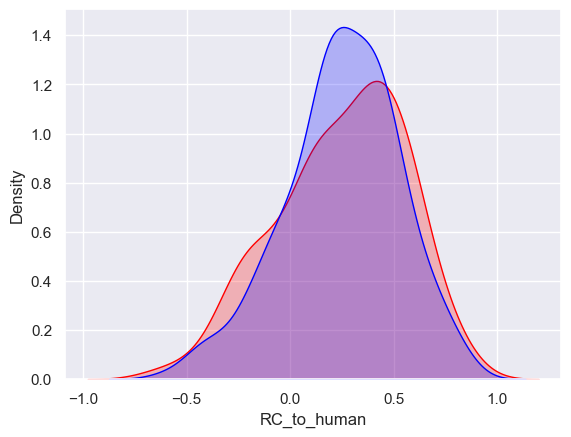

In [8]:
import seaborn as sns

sns.kdeplot(incorrect_df['RC_to_human'], shade=True, color="red", label=f'RC to human, INcorrect answers, all models', linestyle="-")
sns.kdeplot(correct_df['RC_to_human'], shade=True, color="blue", label=f'RC to human, correct answers, all models', linestyle="-")

# s.kdeplot(metric_to_scrambled, shade=True, color="black", label=f'{metric} to scrambled human', linestyle="--")

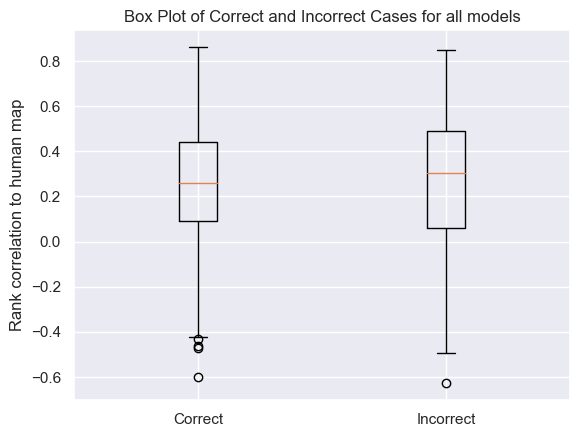

t-statistic: 0.03417205659398541, p-value: 0.48637928874032754


In [9]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Create box plot
plt.boxplot([correct_df['RC_to_human'], incorrect_df['RC_to_human']], labels=['Correct', 'Incorrect'])
plt.ylabel('Rank correlation to human map')
plt.title('Box Plot of Correct and Incorrect Cases for all models')
plt.show()

# Perform t-test
t_stat, p_value = ttest_ind(correct_df['RC_to_human'], incorrect_df['RC_to_human'], alternative='greater')
print(f't-statistic: {t_stat}, p-value: {p_value}')

RQ1 answered with a conclusive NO !!